In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load the data
#df = pd.read_csv("ef_usa_emfac_db.csv")
df = pd.read_csv("usa_combined.csv")

In [3]:
# apply log transformation on the ef column
df['log_ef'] = np.log(df['ef'] - df['ef'].min() + 1)
df['log_ef1'] = np.log(df['log_ef'] - df['log_ef'].min() + 1)
df['log_ef2'] = np.log(df['log_ef1'] - df['log_ef1'].min() + 1)
df['log_ef3'] = np.log(df['log_ef2'] - df['log_ef2'].min() + 1)

In [4]:
df.head()

,reference_year,model_year,fuel_type,ef,pollutant,lower_speed_interval,upper_speed_interval,data_from,log_ef,log_ef1,log_ef2,log_ef3
0,2010,1982,D,0.349365,CH4,0.0,8.0,usa_emfac,0.299627,0.262077,0.232759,0.209255
1,2010,1982,D,0.263701,CH4,9.0,16.0,usa_emfac,0.234037,0.210291,0.190861,0.174676
2,2010,1982,D,0.133710,CH4,17.0,24.0,usa_emfac,0.125487,0.118216,0.111734,0.105921
3,2010,1982,D,0.058837,CH4,25.0,32.0,usa_emfac,0.057162,0.055588,0.054098,0.052685
4,2010,1982,D,0.040486,CH4,33.0,40.0,usa_emfac,0.039678,0.038911,0.038173,0.037463


In [5]:
# create dummy variables for the pollutant column
df = pd.get_dummies(df, columns=['pollutant'])

In [6]:
df.head()

,reference_year,model_year,fuel_type,ef,lower_speed_interval,upper_speed_interval,data_from,log_ef,log_ef1,log_ef2,...,pollutant_NO3,pollutant_NOx,pollutant_PM10,pollutant_PM25,pollutant_ROG,pollutant_SO2,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC
0,2010,1982,D,0.349365,0.0,8.0,usa_emfac,0.299627,0.262077,0.232759,...,0,0,0,0,0,0,0,0,0,0
1,2010,1982,D,0.263701,9.0,16.0,usa_emfac,0.234037,0.210291,0.190861,...,0,0,0,0,0,0,0,0,0,0
2,2010,1982,D,0.133710,17.0,24.0,usa_emfac,0.125487,0.118216,0.111734,...,0,0,0,0,0,0,0,0,0,0
3,2010,1982,D,0.058837,25.0,32.0,usa_emfac,0.057162,0.055588,0.054098,...,0,0,0,0,0,0,0,0,0,0
4,2010,1982,D,0.040486,33.0,40.0,usa_emfac,0.039678,0.038911,0.038173,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# split the data based on the reference year
train_data = df[df['reference_year'] < 2020]
test_data = df[df['reference_year'] >= 2020]

In [8]:
train_data.head()

,reference_year,model_year,fuel_type,ef,lower_speed_interval,upper_speed_interval,data_from,log_ef,log_ef1,log_ef2,...,pollutant_NO3,pollutant_NOx,pollutant_PM10,pollutant_PM25,pollutant_ROG,pollutant_SO2,pollutant_SOX,pollutant_THC,pollutant_TOG,pollutant_VOC
0,2010,1982,D,0.349365,0.0,8.0,usa_emfac,0.299627,0.262077,0.232759,...,0,0,0,0,0,0,0,0,0,0
1,2010,1982,D,0.263701,9.0,16.0,usa_emfac,0.234037,0.210291,0.190861,...,0,0,0,0,0,0,0,0,0,0
2,2010,1982,D,0.133710,17.0,24.0,usa_emfac,0.125487,0.118216,0.111734,...,0,0,0,0,0,0,0,0,0,0
3,2010,1982,D,0.058837,25.0,32.0,usa_emfac,0.057162,0.055588,0.054098,...,0,0,0,0,0,0,0,0,0,0
4,2010,1982,D,0.040486,33.0,40.0,usa_emfac,0.039678,0.038911,0.038173,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# create lagged columns for train_data
train_data['ef_lag7'] = train_data['log_ef3'].shift(7)
train_data['ef_lag15'] = train_data['log_ef3'].shift(15)
train_data['ef_lag30'] = train_data['log_ef3'].shift(30)

In [10]:
# create lagged columns for test_data
test_data['ef_lag7'] = test_data['log_ef3'].shift(7)
test_data['ef_lag15'] = test_data['log_ef3'].shift(15)
test_data['ef_lag30'] = test_data['log_ef3'].shift(30)


In [11]:
# define the features and target columns
features = ['model_year', 'pollutant_CO2', 'pollutant_CO','ef_lag7','pollutant_EC','pollutant_PM10','pollutant_PM25']
#features = ['model_year', 'pollutant_CO','ef_lag7','ef_lag15','ef_lag30','pollutant_EC']
target = 'log_ef'

In [12]:
# create an instance of SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

In [13]:
# fit and transform the training data with the imputer
train_data_imputed = imputer.fit_transform(train_data[features])

In [14]:
# transform the test data with the fitted imputer
test_data_imputed = imputer.transform(test_data[features])

In [15]:
# fit a linear regression model to the training data
lr_model = LinearRegression()
lr_model.fit(train_data_imputed, train_data[target])


LinearRegression()

In [16]:
# make predictions on the test data
predictions = lr_model.predict(test_data_imputed)
train_predictions = lr_model.predict(train_data_imputed)


In [17]:
# calculate the RMSE and R-squared score for the test data
rmse_test = mean_squared_error(test_data[target], predictions, squared=False)
r2_test = r2_score(test_data[target], predictions)
print("Test RMSE:", rmse_test)
print("Test R-squared score:", r2_test)

Test RMSE: 0.7774611762078595
Test R-squared score: 0.9605663272785765


In [18]:
# calculate the RMSE and R-squared score for the training data
rmse_train = mean_squared_error(train_data[target], train_predictions, squared=False)
r2_train = r2_score(train_data[target], train_predictions)
print("Training RMSE:", rmse_train)
print("Training R-squared score:", r2_train)

Training RMSE: 0.7764840385334805
Training R-squared score: 0.9490984125314199


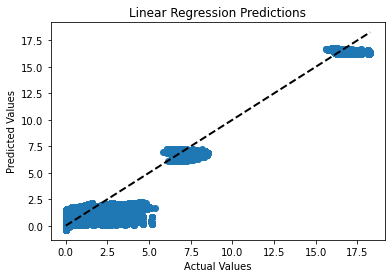

In [19]:
import matplotlib.pyplot as plt

# create a scatter plot of predicted vs actual values for test data
plt.scatter(test_data[target], predictions)
plt.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.show()

In [21]:
# create a scatter plot of the training data
#fig_train = px.scatter(train_data, x=target, y=train_predictions, trendline="ols")
#fig_train.update_layout(title="Training Data: Actual vs. Predicted", xaxis_title="Actual", yaxis_title="Predicted")

# create a scatter plot of the test data
#fig_test = px.scatter(test_data, x=target, y=predictions, trendline="ols")
#fig_test.update_layout(title="Test Data: Actual vs. Predicted", xaxis_title="Actual", yaxis_title="Predicted")

# show the plots
#fig_train.show()
#fig_test.show()